<a href="https://colab.research.google.com/github/Cauet-Menezes/Inteligencia_Artificial/blob/main/Algoritmo_genetico_particao_de_dados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


## Nome: Cauet Corrêa de Menezes
## Nome: Gustavo Carvalho Alves dos Santos

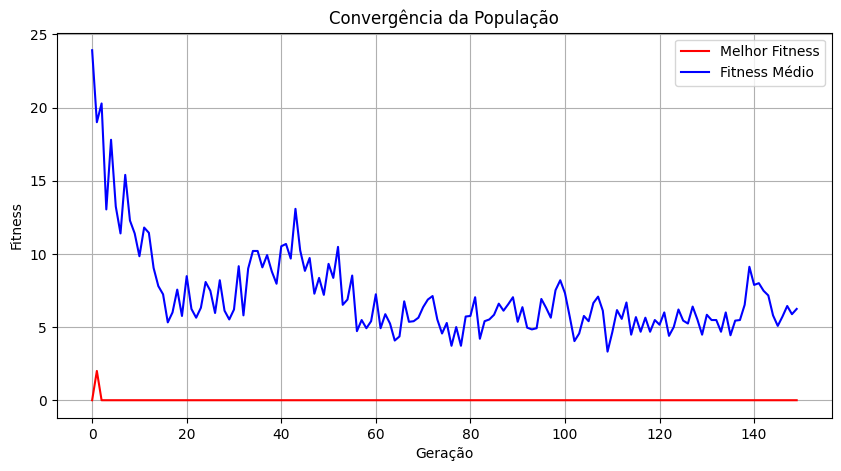

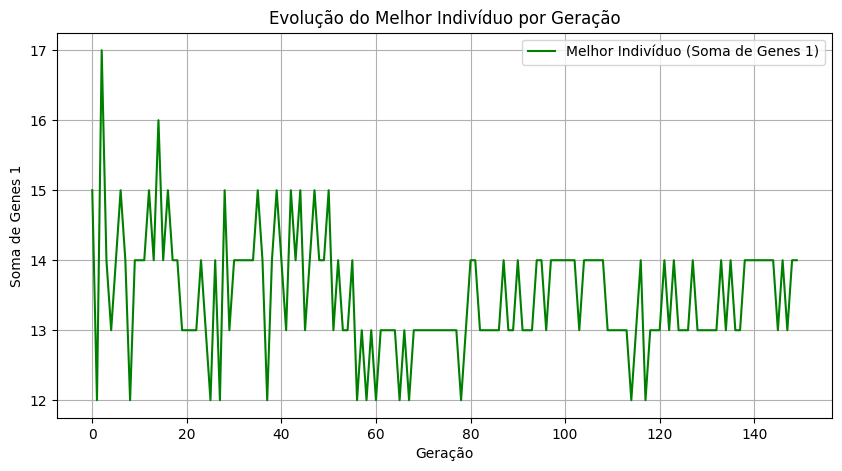

In [35]:
  import numpy as np
  import matplotlib.pyplot as plt

  dimensao = 30                                # Numero de genes
  pop_size = 50                                # Tamanho da populacao
  k = 3                                        # Pressao seletiva
  vet_int = np.random.randint(0, 10, dimensao) # Parametro para o fitness
  probabilidade_de_mutacao = 0.02              # Probabilidade de mutacao
  probabilidade_de_crossover = 0.9             # Probabilidade de crossover
  numero_de_geracoes = 150                     # Numero de geracoes

  # Gera a população inicial
  def gera_populacao(dimensao, pop_size):
      return np.random.randint(0, 2, (pop_size, dimensao))

  # Avalia o fitness
  def avalia_fitness(individuo, vet_int):
      indice_A = np.where(individuo == 1)
      indice_B = np.where(individuo == 0)
      A = vet_int[indice_A]
      B = vet_int[indice_B]
      return np.abs(np.sum(A) - np.sum(B))

  # Seleção por torneio
  def selecao_torneio(pop, fitness, k):
      indices_selecionados = np.random.randint(0, pop_size, k)
      indice_fit = np.argmin(fitness[indices_selecionados])
      return pop[indices_selecionados[indice_fit]]

  # Mutação
  def mutacao(individuo, probabilidade_de_mutacao):
      for i in range(len(individuo)):
          if np.random.rand() < probabilidade_de_mutacao:
              individuo[i] = 1 - individuo[i]
      return individuo

  # Cruzamento
  def crossover(individuo1, individuo2, probabilidade_de_crossover):
      if np.random.rand() < probabilidade_de_crossover:
          ponto = np.random.randint(1, len(individuo1) - 1)
          filho_1 = np.concatenate((individuo1[:ponto], individuo2[ponto:]))
          filho_2 = np.concatenate((individuo2[:ponto], individuo1[ponto:]))
          return filho_1, filho_2
      return individuo1.copy(), individuo2.copy()

  # Gerar população inicial
  pop = gera_populacao(dimensao, pop_size)
  fitness = np.zeros(pop_size)

  # Armazenar o melhor fitness e o melhor indivíduo de cada geração
  historico_melhor_fitness = []
  historico_fitness_medio = []
  historico_melhor_individuo = []
  historico_melhor_individuo_soma = []

  # Avaliar fitness inicial da população
  for i in range(pop_size):
      fitness[i] = avalia_fitness(pop[i], vet_int)

  # Evolução das gerações
  for g in range(numero_de_geracoes):
      for i in range(pop_size):
          fitness[i] = avalia_fitness(pop[i], vet_int)

      # Melhor fitness e o índice do melhor indivíduo
      melhor_fitness = np.min(fitness)
      melhor_indice = np.argmin(fitness)

      # Média do fitness da população
      fitness_medio = np.mean(fitness)

      # Armazenar o melhor fitness e a média
      historico_melhor_fitness.append(melhor_fitness)
      historico_fitness_medio.append(fitness_medio)

      # Armazena o melhor indivíduo e sua soma de genes 1
      historico_melhor_individuo.append(pop[melhor_indice])
      historico_melhor_individuo_soma.append(np.sum(pop[melhor_indice]))

      # Nova população
      nova_populacao = []
      for j in range(int(pop_size / 2)):
          ind_A = selecao_torneio(pop, fitness, k)
          ind_B = selecao_torneio(pop, fitness, k)
          filho_1, filho_2 = crossover(ind_A, ind_B, probabilidade_de_crossover)
          filho_1 = mutacao(filho_1, probabilidade_de_mutacao)
          filho_2 = mutacao(filho_2, probabilidade_de_mutacao)
          nova_populacao.extend([filho_1, filho_2])

      pop = np.array(nova_populacao[:pop_size])

  # Gráfico de convergência (fitness)
  plt.figure(figsize=(10, 5))
  plt.plot(historico_melhor_fitness, label='Melhor Fitness', color='red')
  plt.plot(historico_fitness_medio, label='Fitness Médio', color='blue')
  plt.title('Convergência da População')
  plt.xlabel('Geração')
  plt.ylabel('Fitness')
  plt.legend()
  plt.grid(True)
  plt.show()

  # Gráfico da soma de genes '1' do melhor indivíduo por geração
  plt.figure(figsize=(10, 5))
  plt.plot(historico_melhor_individuo_soma, label='Melhor Indivíduo (Soma de Genes 1)', color='green')
  plt.title('Evolução do Melhor Indivíduo por Geração')
  plt.xlabel('Geração')
  plt.ylabel('Soma de Genes 1')
  plt.legend()
  plt.grid(True)
  plt.show()
